### LAB: Regression - Hyperparameter optimization

The goal of this lab is to learn how to select model hyperparameters applying Ridge and Lasso regularization approaches. 

We will ilustrate this with Boston Housing dataset. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the average price of houses in Boston (in 1970s) using the given features. Data makes part of the sklearn library *datasets*. 

In [1]:
from sklearn import datasets  #load_boston,load_digits, ect.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV


In [2]:
#load the data
boston_dataset = datasets.load_boston()

#dictionary with 4 keys
print(boston_dataset.keys()) 

# key feature names 
print(boston_dataset.feature_names)

#Explore the other keys 
#key target
print(boston_dataset.target)

#key DESCR
print(boston_dataset.DESCR)

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.

C:\Users\Renan\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

- data: contains the information for various houses

- target: prices of the house

- feature_names: names of the features

- DESCR: describes the dataset

The prices of the house indicated by the variable MEDV is the target variable and the remaining are the feature variables based on which we will predict the value of a house.

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per USD 10,000
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of people of African American descent by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [4]:
#add an extra column with the target
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Data preprocessing
After loading the data, it’s a good practice to see if there are any missing values in the data. We count the number of missing values for each feature using isnull()

In [5]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Exploratory Data Analysis
Exploratory Data Analysis is an important step before training a model.
Plot the distribution of the target variable MEDV. Use *distplot* function from the *seaborn* library.You are expected to get a similar figure. 

<img src="images/f1.png" style="width:200px;height:150px;">

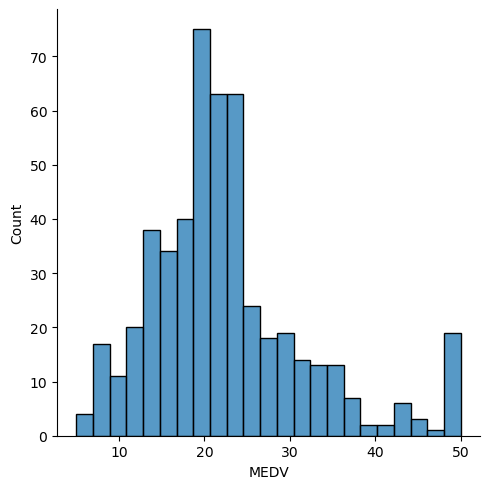

In [6]:
sns.displot(data=boston, x="MEDV")
plt.show()

### Correlation matrix
The correlation matrix measures the linear relationships between the variables. It can be computed by using the *corr* function from the *pandas* dataframe library. 
The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

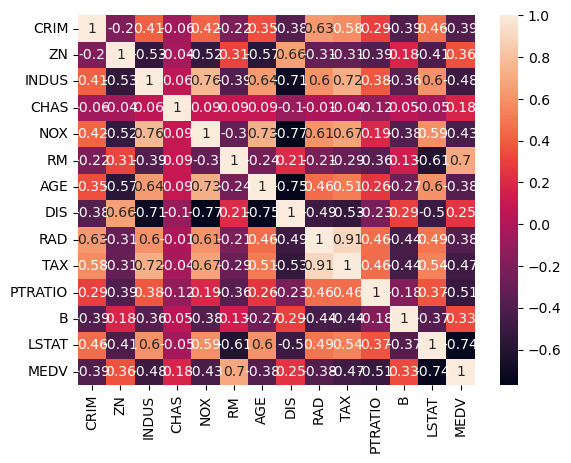

In [9]:
correlation_matrix = boston.corr().round(2)
sns.heatmap(correlation_matrix, annot=True)
plt.show()

def print_correlation(dataset):
    correlation_matrix = dataset.corr().round(2)
    sns.heatmap(correlation_matrix, annot=True)
    plt.show()

Use *heatmap* function from *seaborn* library to get a similar figure as the one below. 

<img src="images/f2.png" style="width:400px;height:300px;">

Argument *annot = True* to print the values inside the cells.

### Feature selection

To fit a linear regression model, we select those features which have a high correlation with the target variable MEDV. 
Choose the features with the highest positive and negative correlation. 

Use a scatter plot to see how these features vary with MEDV, as for example the figure below. 

<img src="images/f3.png" style="width:400px;height:150px;">

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model.  Same goes for the features DIS and AGE which have a correlation of -0.75.

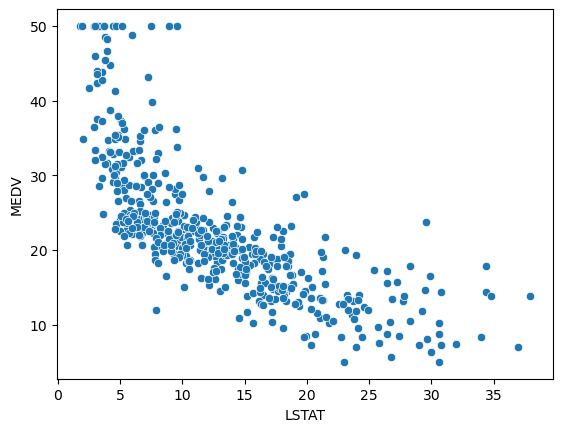

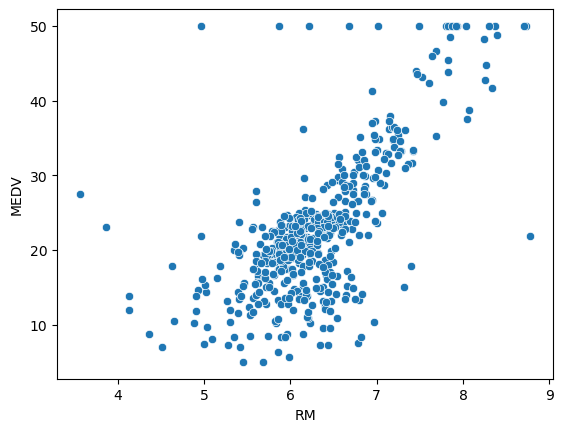

(506, 2)
(506,)
        RM  LSTAT
0    6.575   4.98
1    6.421   9.14
2    7.185   4.03
3    6.998   2.94
4    7.147   5.33
..     ...    ...
501  6.593   9.67
502  6.120   9.08
503  6.976   5.64
504  6.794   6.48
505  6.030   7.88

[506 rows x 2 columns]


In [23]:
# Create data matrix X with the chosen 2 features and 
# vector Y with the target variable MEDV. 

X = boston[["RM","LSTAT"]]
Y = boston["MEDV"]

sns.scatterplot(data=boston, x="LSTAT",y="MEDV")
plt.show()
sns.scatterplot(data=boston, x="RM",y="MEDV")
plt.show()

#print their shapes 
print(X.shape)
print(Y.shape)
print(X)

### Split the data into training and testing sets
Train the model with 80% of the samples and test with the remaining 20%.  Use *train_test_split* function provided by sklearn library.
Print the sizes of the training and test set to verify if the splitting has occurred properly.

Choose random_state = 5 in order to compare the results. 

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=5)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(404, 2)
(404,)
(102, 2)
(102,)


### Model 1: Linear regression model 

Use sklearn function *LinearRegression* to create and train the model. 

- model= define the LinearRegression operator. 
- model.fit(?,?) with the training data


In [27]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

### Model 1 performance on train and test set 

Metrics: RMSE, MSE, R2-score

- model.predict(?) for the training data
- compute mean_squared_error (mse_train= ? ) 
- compute r2_score (r2_train=?)
- compute root (np.sqrt) mean_squared_error (rmse_train=?) 
- print those metrics 

- compute the same metrics for the test data 

In [31]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def predictions(model, X_train, Y_train, X_test, Y_test):
    y_train_predict = model.predict(X_train)
    mse_train = mean_squared_error(y_true=Y_train,y_pred=y_train_predict)
    r2_train = r2_score(y_true=Y_train,y_pred=y_train_predict)
    rmse_train = np.sqrt(mse_train)
    
    # model evaluation for testing set
    y_test_predict = model.predict(X_test)
    mse_test = mean_squared_error(y_true=Y_test,y_pred=y_test_predict)
    r2_test = r2_score(y_true=Y_test,y_pred=y_test_predict)
    rmse_test = np.sqrt(mse_test)
    
    print("The model performance for training set")
    print(f"Mean squared error: {mse_train}")
    print(f"Root mean squared error: {rmse_train}")
    print(f"R2 score: {r2_train}")
    print()
    print("The model performance for testing set")
    print(f"Mean squared error: {mse_test}")
    print(f"Root mean squared error: {rmse_test}")
    print(f"R2 score: {r2_test}")

y_train_predict = model.predict(X_train)
mse_train = mean_squared_error(y_true=Y_train,y_pred=y_train_predict)
r2_train = r2_score(y_true=Y_train,y_pred=y_train_predict)
rmse_train = np.sqrt(mse_train)

print("The model performance for training set")
print(f"Mean squared error: {mse_train}")
print(f"Root mean squared error: {rmse_train}")
print(f"R2 score: {r2_train}")

# model evaluation for testing set
y_test_predict = model.predict(X_test)
mse_test = mean_squared_error(y_true=Y_test,y_pred=y_test_predict)
r2_test = r2_score(y_true=Y_test,y_pred=y_test_predict)
rmse_test = np.sqrt(mse_test)

print()
print("The model performance for testing set")
print(f"Mean squared error: {mse_test}")
print(f"Root mean squared error: {rmse_test}")
print(f"R2 score: {r2_test}")

The model performance for training set
Mean squared error: 31.77722714032021
Root mean squared error: 5.637129335071195
R2 score: 0.6300745149331701

The model performance for testing set
Mean squared error: 26.392886822666085
Root mean squared error: 5.137400784702911
R2 score: 0.6628996975186953


###  Model 2: Ridge regression model

Apply Ridge regression model and choose the regularization hyper-parameter.

In class we call it *lambda* but in sklearn it is configured via “alpha” argument. Default value = 1.0. 

Define the *Ridge* operator and a range of “alpha” values. 

Call *GridSearchCV*. Parameters are set based on some score function. By default these are the sklearn.metrics.accuracy_score for classification and sklearn.metrics.r2_score for regression.

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10]}
ridge_regressor=GridSearchCV(ridge,parameters, cv=5)

ridge_regressor.fit(X_train,Y_train)

print(ridge_regressor.best_params_)


{'alpha': 1}


### Model  2 performance on train and test set 

Metrics: RMSE, MSE, R2-score

Follow the same sequence as with Model 1. 

In [34]:
# model evaluation for training set
model_ridge = Ridge(alpha=1)
model_ridge.fit(X_train, Y_train)

y_train_predict = model_ridge.predict(X_train)
mse_train = mean_squared_error(y_true=Y_train,y_pred=y_train_predict)
r2_train = r2_score(y_true=Y_train,y_pred=y_train_predict)
rmse_train = np.sqrt(mse_train)

print("The model performance for training set")
print(f"Mean squared error: {mse_train}")
print(f"Root mean squared error: {rmse_train}")
print(f"R2 score: {r2_train}")

# model evaluation for testing set
y_test_predict = model_ridge.predict(X_test)
mse_test = mean_squared_error(y_true=Y_test,y_pred=y_test_predict)
r2_test = r2_score(y_true=Y_test,y_pred=y_test_predict)
rmse_test = np.sqrt(mse_test)

print()
print("The model performance for testing set")
print(f"Mean squared error: {mse_test}")
print(f"Root mean squared error: {rmse_test}")
print(f"R2 score: {r2_test}")


The model performance for training set
Mean squared error: 31.77762062184724
Root mean squared error: 5.637164235841213
R2 score: 0.630069934330712

The model performance for testing set
Mean squared error: 26.44419839700965
Root mean squared error: 5.142392283462012
R2 score: 0.6622443259654345


###  Model 3: Lasso regression model

Apply *Lasso* regression model and choose the regularization hyper-parameter.
Follow the sequence of comands for Model 2. 

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10]}
lasso_regressor = GridSearchCV(ridge,parameters, cv=5)

lasso_regressor.fit(X_train,Y_train)

print(lasso_regressor.best_params_)

{'alpha': 1}


### Model  3 performance on train and test set 

Metrics: RMSE, MSE, R2-score

In [35]:
# model evaluation for training set
model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train, Y_train)

y_train_predict = model_lasso.predict(X_train)
mse_train = mean_squared_error(y_true=Y_train,y_pred=y_train_predict)
r2_train = r2_score(y_true=Y_train,y_pred=y_train_predict)
rmse_train = np.sqrt(mse_train)

print("The model performance for training set")
print(f"Mean squared error: {mse_train}")
print(f"Root mean squared error: {rmse_train}")
print(f"R2 score: {r2_train}")

# model evaluation for testing set
y_test_predict = model_lasso.predict(X_test)
mse_test = mean_squared_error(y_true=Y_test,y_pred=y_test_predict)
r2_test = r2_score(y_true=Y_test,y_pred=y_test_predict)
rmse_test = np.sqrt(mse_test)

print()
print("The model performance for testing set")
print(f"Mean squared error: {mse_test}")
print(f"Root mean squared error: {rmse_test}")
print(f"R2 score: {r2_test}")


The model performance for training set
Mean squared error: 34.59964977579092
Root mean squared error: 5.882146697914879
R2 score: 0.5972180904918656

The model performance for testing set
Mean squared error: 32.811000939463796
Root mean squared error: 5.72808876846927
R2 score: 0.5809250266663202


### Basic functions to test models
In order to facilitate the experimentation of different models

In [41]:
def predictions(model, X_train, Y_train, X_test, Y_test):
    y_train_predict = model.predict(X_train)
    mse_train = mean_squared_error(y_true=Y_train,y_pred=y_train_predict)
    r2_train = r2_score(y_true=Y_train,y_pred=y_train_predict)
    rmse_train = np.sqrt(mse_train)
    
    # model evaluation for testing set
    y_test_predict = model.predict(X_test)
    mse_test = mean_squared_error(y_true=Y_test,y_pred=y_test_predict)
    r2_test = r2_score(y_true=Y_test,y_pred=y_test_predict)
    rmse_test = np.sqrt(mse_test)
    
    print("The model performance for training set")
    print(f"Mean squared error: {mse_train}")
    print(f"Root mean squared error: {rmse_train}")
    print(f"R2 score: {r2_train}")
    print()
    print("The model performance for testing set")
    print(f"Mean squared error: {mse_test}")
    print(f"Root mean squared error: {rmse_test}")
    print(f"R2 score: {r2_test}")
    
def investigateCV(model, X_train, Y_train):
    parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10]}
    regressor = GridSearchCV(model,parameters, cv=5)
    regressor.fit(X_train,Y_train)
    print(regressor.best_params_)
    return regressor

### Regression models with all features 

Apply the same 3 models (LinearRegression, Ridge, Lasso) for all features. 


In [40]:
X2=boston_dataset.data
Y2=boston_dataset.target

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, train_size=0.8, random_state=5)

print(f"X train: {X2_train.shape}")
print(f"Y train: {Y2_train.shape}")
print(f"X test: {X2_test.shape}")
print(f"Y test: {Y2_test.shape}")

X train: (404, 13)
Y train: (404,)
X test: (102, 13)
Y test: (102,)


## Linear Regression

In [42]:
model_unregular = LinearRegression()
model_unregular.fit(X2_train, Y2_train)

predictions(model_unregular, X2_train, Y2_train, X2_test, Y2_test)

The model performance for training set
Mean squared error: 22.477090408387635
Root mean squared error: 4.741000992236517
R2 score: 0.7383393920590519

The model performance for testing set
Mean squared error: 20.86929218377072
Root mean squared error: 4.568292042303198
R2 score: 0.7334492147453087


## Ridge Regression

In [43]:
model_ridge = Ridge()
model_ridge.fit(X2_train, Y2_train)

predictions(model_ridge, X2_train, Y2_train, X2_test, Y2_test)

The model performance for training set
Mean squared error: 22.635796875161088
Root mean squared error: 4.757709204560645
R2 score: 0.7364918561980667

The model performance for testing set
Mean squared error: 21.599270335618908
Root mean squared error: 4.647501515397161
R2 score: 0.7241256474733331


## Lasso Regression

In [44]:
model_lasso = Lasso()
model_lasso.fit(X2_train, Y2_train)

predictions(model_lasso, X2_train, Y2_train, X2_test, Y2_test)

The model performance for training set
Mean squared error: 27.141455171537963
Root mean squared error: 5.209746171507588
R2 score: 0.684040526084441

The model performance for testing set
Mean squared error: 29.355825654837467
Root mean squared error: 5.418101665236401
R2 score: 0.6250558806119064
